## Exercise 1

(a) Rewrite 
$$K(x) = \mathbb{1}_{|x|\leq \frac{1}{2}}.$$
Then
$$\begin{split}
\mathbb{E}\left[\hat{f}_n(x)\right]
&= \mathbb{E}\left[ \frac{1}{n} \sum_{i=1}^n \frac{1}{h} K\left( \frac{x - X_i}{h} \right)  \right] \\
&= \frac{1}{h} \mathbb{E}\left[  K\left( \frac{x - X_i}{h} \right)  \right] \\
&= \frac{1}{h} \mathbb{E}\left[  \mathbb{1}_{\left|\frac{x - X_i}{h}\right|\leq \frac{1}{2}}  \right] \\
&= \frac{1}{h} \mathbb{P}\left( \left|\frac{x - X_i}{h}\right|\leq \frac{1}{2}  \right) \\
&= \frac{1}{h} \mathbb{P}\left( x - \frac{h}{2} \leq X_i \leq x + \frac{h}{2}  \right) \\
&= \frac{1}{h} \int_{x - \frac{h}{2}}^{x + \frac{h}{2}} f(y) dy \\
\end{split}$$
and
$$\begin{split}
\mathbb{V}\left[\hat{f}_n(x)\right]
&= \frac{1}{nh^2} \mathbb{V}\left[K\left( \frac{x - X_i}{h} \right)\right] \\
&= \frac{1}{nh^2} \mathbb{V}\left[ \mathbb{1}_{\left|\frac{x - X_i}{h}\right|\leq \frac{1}{2}} \right] \\
&= \frac{1}{nh^2} \left( \mathbb{E}\left[ \mathbb{1}^2_{\left|\frac{x - X_i}{h}\right|\leq \frac{1}{2}} \right] - \mathbb{E}\left[ \mathbb{1}_{\left|\frac{x - X_i}{h}\right|\leq \frac{1}{2}} \right]^2\right) \\
&= \frac{1}{nh^2} \left( \mathbb{E}\left[ \mathbb{1}_{\left|\frac{x - X_i}{h}\right|\leq \frac{1}{2}} \right] - \mathbb{E}\left[ \mathbb{1}_{\left|\frac{x - X_i}{h}\right|\leq \frac{1}{2}} \right]^2\right) \\
&= \frac{1}{nh^2} \left( \int_{x - \frac{h}{2}}^{x + \frac{h}{2}} f(y) dy  - \left( \int_{x - \frac{h}{2}}^{x + \frac{h}{2}} f(y) dy \right)^2\right) \\
\end{split}$$

(b) Assume that $f$ is bounded and $\sup f(x) = b$. Then
$$\int_{x - \frac{h}{2}}^{x + \frac{h}{2}} f(y) dy \leq b h,$$
so
$$\begin{split}
\mathbb{V}\left[\hat{f}_n(x)\right]
&= \frac{1}{nh^2} \left( \int_{x - \frac{h}{2}}^{x + \frac{h}{2}} f(y) dy  - \left( \int_{x - \frac{h}{2}}^{x + \frac{h}{2}} f(y) dy \right)^2\right) \\
&\leq \frac{1}{nh^2} \int_{x - \frac{h}{2}}^{x + \frac{h}{2}} f(y) dy \\
&\leq \frac{1}{nh^2} hb \\
&= \frac{b}{nh} \to 0
\end{split}$$
as $n \to \infty$, thus $\mathbb{V}\left[\hat{f}_n(x)\right] \to 0$. Whereas
$$\begin{split}
\mathbb{E}\left[\hat{f}_n(x)\right]
&= \frac{1}{h} \int_{x - \frac{h}{2}}^{x + \frac{h}{2}} f(y) dy \\
&= \frac{F\left(x + \frac{h}{2}\right) - F\left(x - \frac{h}{2}\right)}{h} \to f(x) \\
\end{split}$$
as $h \to 0$.

Using the results of Exercise 2 in Chapter 5, we have $\hat{f}_n(x) \xrightarrow{qm} f(x)$, so by Theorem 5.4(a), $\hat{f}_n(x) \xrightarrow{P} f(x)$.

## Exercise 2

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('glass.dat', sep='\\s+')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
1,3.01,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,WinF
2,-0.39,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,WinF
3,-1.82,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,WinF
4,-0.34,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,WinF
5,-0.58,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,WinF
...,...,...,...,...,...,...,...,...,...,...
210,-1.77,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,Head
211,-1.15,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,Head
212,2.65,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,Head
213,-1.49,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,Head


#### Histogram

In [3]:
def cross_validation_score_hist(x, m):
    n = x.shape[0]
    h = (np.max(x) - np.min(x)) / m
    p_hat = np.histogram(x, bins=m)[0] / n
    return 2 / (n - 1) / h - np.sum(p_hat ** 2) * (n + 1) / h / (n - 1)

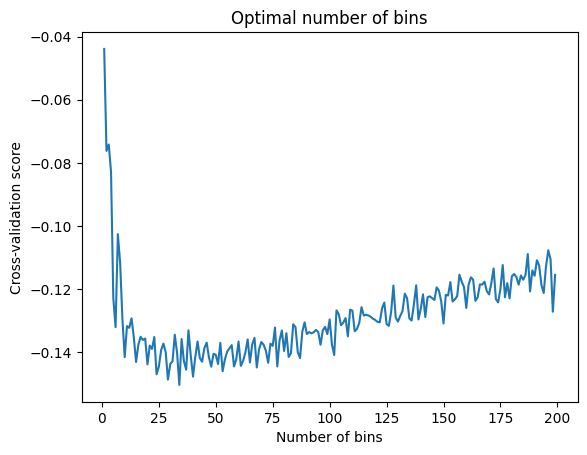

In [4]:
ms = np.arange(1, 200)
fig, ax = plt.subplots()
ax.plot(ms, [cross_validation_score_hist(data['RI'], m) for m in ms]);
ax.set_xlabel('Number of bins');
ax.set_ylabel('Cross-validation score');
ax.set_title('Optimal number of bins');

The optimal number of bins is around 30.

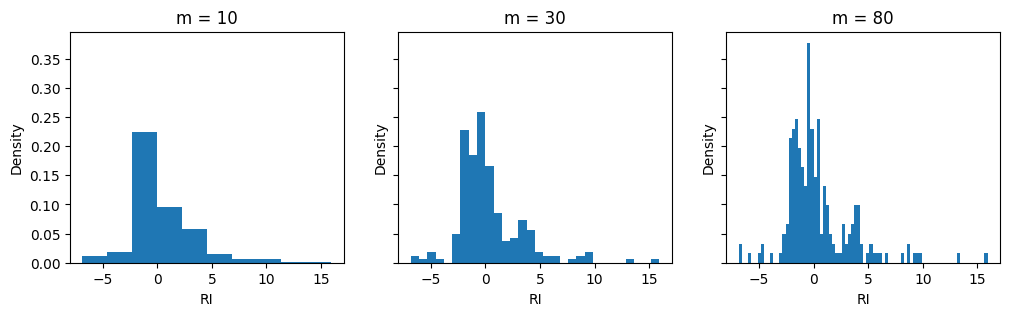

In [5]:
ms = [10, 30, 80]
fig, axs = plt.subplots(1, len(ms), figsize=(len(ms) * 4, 3), sharex=True, sharey=True)
for i, m in enumerate(ms):
    axs[i].hist(data['RI'], bins=m, density=True);
    axs[i].set_title(f'm = {m}');
    axs[i].set_xlabel('RI');
    axs[i].set_ylabel('Density');

In [6]:
alpha = 0.95

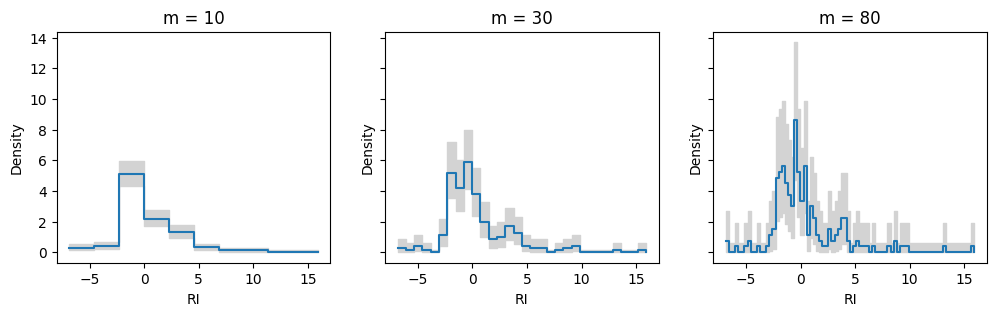

In [7]:
ms = [10, 30, 80]
fig, axs = plt.subplots(1, len(ms), figsize=(len(ms) * 4, 3), sharex=True, sharey=True)
for i, m in enumerate(ms):
    h = 1 / m
    n = data['RI'].shape[0]
    hist = np.histogram(data['RI'], bins=m)
    f_hat = hist[0] / n / h
    c = stats.norm.ppf(1 - alpha / 2 / m) / 2 * np.sqrt(m / n)
    l = np.maximum(np.sqrt(f_hat) - c, 0) ** 2
    u = (np.sqrt(f_hat) + c) ** 2

    axs[i].fill_between(hist[1], np.concatenate([l, [0]]), np.concatenate([u, [0]]), step='post', color='lightgrey');
    axs[i].step(hist[1], np.concatenate([f_hat, [0]]), where='post');
    axs[i].set_title(f'm = {m}');
    axs[i].set_xlabel('RI');
    axs[i].set_ylabel('Density');

#### KDE

In [8]:
import scipy.stats as stats

In [9]:
def cross_validation_score_kde(K, K2, x, h):
    n = x.shape[0]
    y = (x.reshape(-1, 1) - x.reshape(1, -1)) / h
    return np.sum(K2(y) - 2 * K(y)) / h / n ** 2 + 2 * K(0) / h / n

In [10]:
K = stats.norm.pdf
K2 = stats.norm(scale=np.sqrt(2)).pdf

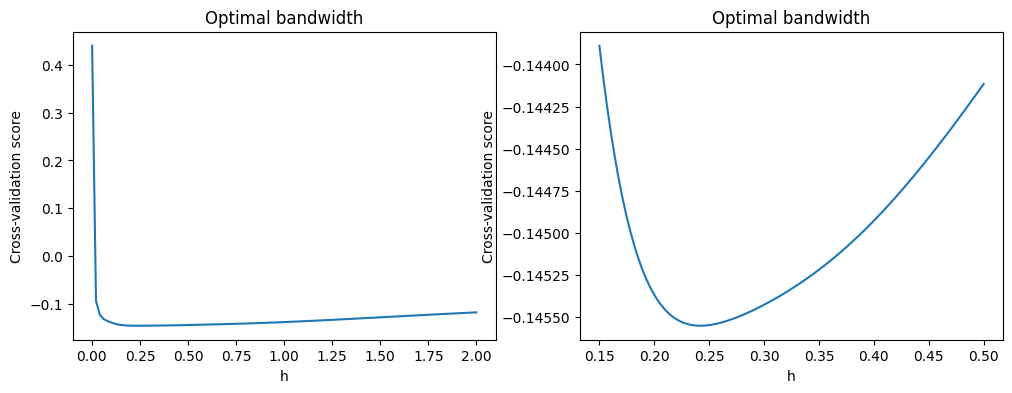

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

hs = np.linspace(0.001, 2, 100)
axs[0].plot(hs, [cross_validation_score_kde(K, K2, data['RI'].values, h) for h in hs]);
axs[0].set_xlabel('h');
axs[0].set_ylabel('Cross-validation score');
axs[0].set_title('Optimal bandwidth');

hs = np.linspace(0.15, 0.5, 100)
axs[1].plot(hs, [cross_validation_score_kde(K, K2, data['RI'].values, h) for h in hs]);
axs[1].set_xlabel('h');
axs[1].set_ylabel('Cross-validation score');
axs[1].set_title('Optimal bandwidth');

The expression for $s(x)$ given on page 317:

In [12]:
def s_kde(K, data, h, x):
    Y = K((x.reshape(-1, 1) - data.reshape(1, -1)) / h) / h
    return np.std(Y, ddof=1, axis=1)

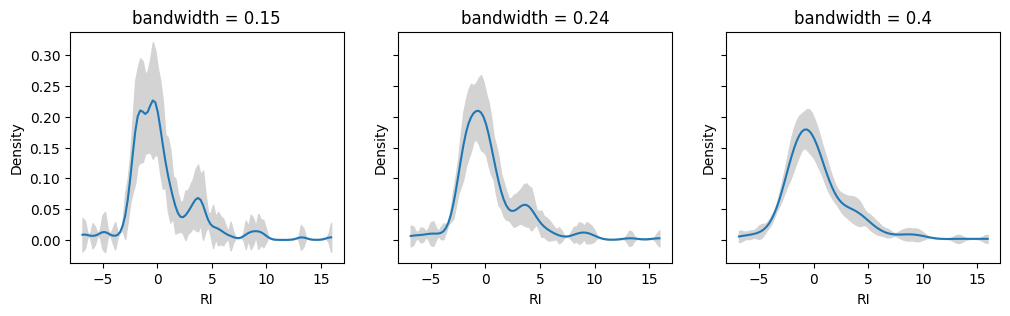

In [13]:
bws = [0.15, 0.24, 0.4]
x = data['RI'].values
n = x.shape[0]
xs = np.linspace(np.min(x), np.max(x), 100)
fig, axs = plt.subplots(1, len(bws), figsize=(len(bws) * 4, 3), sharex=True, sharey=True);
for i, h in enumerate(bws):
    kde = stats.gaussian_kde(x, bw_method=h)
    f_hat = kde.pdf(xs)
    m = (np.max(x) - np.min(x)) / 3 / h
    q = stats.norm.ppf((1 + (1 - alpha) ** (1 / m)) / 2)
    se = s_kde(K, x, h, xs) / np.sqrt(n)
    l = f_hat - q * se
    u = f_hat + q * se
    axs[i].fill_between(xs, l, u, color='lightgray');
    axs[i].plot(xs, f_hat);
    axs[i].set_title(f'bandwidth = {h}');
    axs[i].set_xlabel('RI');
    axs[i].set_ylabel('Density');

## Exercise 3

In [14]:
from kreg import w, r, cross_validation_score_reg, kreg_conf_int

In [15]:
xi = data['Al'].values
yi = data['RI'].values
n = xi.shape[0]

In [16]:
hs = np.linspace(0.1, 0.3, 100)
bw = np.fromiter((cross_validation_score_reg(K, xi, yi, h) for h in hs), float)

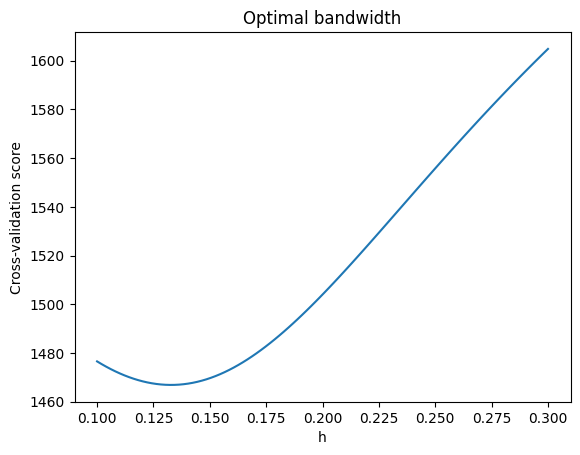

In [17]:
fig, ax = plt.subplots()
ax.plot(hs, bw);
ax.set_xlabel('h');
ax.set_ylabel('Cross-validation score');
ax.set_title('Optimal bandwidth');

The optimal bandwidth:

In [18]:
h = hs[np.argmin(bw)]
h

np.float64(0.13232323232323234)

In [19]:
alpha = 0.05
xs = np.linspace(np.min(xi), np.max(xi), 100)
r_hat, l, u = kreg_conf_int(K, xi, yi, h, alpha, xs)

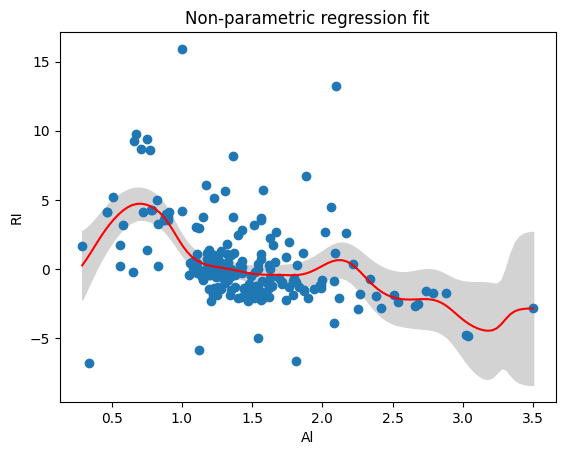

In [20]:
fig, ax = plt.subplots()
ax.fill_between(xs, l, u, color='lightgray');
ax.plot(xs, r_hat, color='red');
ax.scatter(xi, yi);
ax.set_xlabel('Al');
ax.set_ylabel('RI');
ax.set_title('Non-parametric regression fit');

## Exercise 4

We have
$$\begin{split}
\int b^2(x) dx + \int v(x) dx 
&= \int \left(\mathbb{E}[\hat{g}_n(x)] - g(x)\right)^2 dx + \int \mathbb{E}\left[ (\hat{g}_n(x) - \mathbb{E}(\hat{g}_n(x)))^2 \right] dx\\
&= \int \left( \mathbb{E}[\hat{g}_n(x)]^2 - 2 g(x) \mathbb{E}[\hat{g}_n(x)] + g(x)^2 + \mathbb{E}\left[\hat{g}_n(x)^2\right] - \mathbb{E}[\hat{g}_n(x))]^2 \right) dx\\
&= \int \left( \mathbb{E}\left[\hat{g}_n(x)^2\right] - 2 g(x) \mathbb{E}[\hat{g}_n(x)] + g(x)^2 \right) dx\\
&= \int \mathbb{E}\left[(\hat{g}_n(x) - g(x))^2\right] dx. \\
\end{split}$$
Assuming $(\hat{g}_n(x) - g(x))^2$ is measurable, by Fubini's theorem,
$$\begin{split}
\int \mathbb{E}\left[(\hat{g}_n(x) - g(x))^2\right] dx
&= \mathbb{E} \left[ \int (\hat{g}_n(x) - g(x))^2 dx \right] \\
&= R(f, \hat{f}),
\end{split}$$
thus 
$$R(f, \hat{f}) = \int b^2(x) dx + \int v(x) dx.$$

## Exercise 5

The distribution of the number of observations in the bin $B_j$
$$\nu_j \sim \text{Binomial}(n, p_j).$$

Then
$$\mathbb{E}\left[\hat{f}_n(x)\right] = \mathbb{E}\left[\frac{\hat{p}_j}{h}\right] = \frac{1}{h} \mathbb{E}\left[\hat{p}_j\right] = \frac{1}{h} \mathbb{E}\left[\frac{\nu_j}{n}\right] = \frac{1}{nh} \mathbb{E}[\nu_j] = \frac{nh} n p_j = \frac{p_j}{h}$$
and
$$\mathbb{V}\left[\hat{f}_n(x)\right] = \mathbb{V}\left[\frac{\hat{p}_j}{h}\right] = \frac{1}{h^2} \mathbb{V}\left[\hat{p}_j\right] = \frac{1}{h^2} \mathbb{V}\left[\frac{\nu_j}{n}\right] = \frac{1}{n^2 h^2} \mathbb{V}[\nu_j] = \frac{n^2 h^2} n p_j (1 - p_j) = \frac{p_j (1 - p_j)}{n h^2}.$$

## Exercise 6

Since $\hat{f}_n(x)$ is piece-wise constant, we have
$$\int \left( \hat{f}_n(x) \right)^2 dx = \sum_{j=1}^m \left(\frac{\hat{p}_j}{h}\right)^2 h = \frac{1}{h} \sum_{j=1}^m \hat{p}_j^2.$$

Removing one observation reduces the number of items in the corresponding bin as well as the total number of items, so assuming that $X_i \in B_j$, we have
$$\hat{f}_{(-i)}(X_i) = \frac{\hat{p_j} n - 1}{(n - 1) h}.$$
There are $\hat{p}_j n$ such observation in $B_j$, thus
$$\begin{split}
\sum_{i=1}^n \hat{f}_{(-1)}(X_i) 
&= \sum_{j=1}^m \hat{p}_j n \frac{\hat{p}_j n - 1}{(n - 1) h} \\
&= \frac{n}{(n-1)h} \sum_{j=1}^m \hat{p}_j (\hat{p}_j n - 1) \\
&= \frac{n}{(n-1)h} \sum_{j=1}^m \left( \hat{p}_j^2 n - \hat{p}_j \right) \\
&= \frac{n}{(n-1)h} \left( n \sum_{j=1}^m \hat{p}_j^2 - \sum_{j=1}^m \hat{p}_j \right) \\
&= \frac{n}{(n-1)h} \left( n \sum_{j=1}^m \hat{p}_j^2 - 1 \right). \\
\end{split}$$

Finally,
$$\begin{split}
\hat{J}(h) 
&= \int \left( \hat{f}_n(x) \right)^2 dx - \frac{2}{n} \sum_{i=1}^n \hat{f}_{(-1)}(X_i) \\
&= \frac{1}{h} \sum_{j=1}^m \hat{p}_j^2 - \frac{2}{n} \frac{n}{(n-1)h} \left( n \sum_{j=1}^m \hat{p}_j^2 - 1 \right) \\
&= \frac{1}{h} \sum_{j=1}^m \hat{p}_j^2 - \frac{2n}{(n-1)h} \sum_{j=1}^m \hat{p}_j^2 +  \frac{2}{h(n - 1)} \\
&= \frac{2}{h (n - 1)} + \frac{1}{h} \sum_{j=1}^m \hat{p}_j^2 \left(1 - \frac{2n}{n-1} \right) \\
&= \frac{2}{h (n - 1)} - \frac{n + 1}{h(n - 1)} \sum_{j=1}^m \hat{p}_j^2. \\
\end{split}$$

## Exercise 7

The first terms in the expressions for $J(j)$ and $\hat{J}(h)$ are identical, so we only need to check the equality
$$\mathbb{E}\left[\int \hat{f}_n(x) f(x) dx\right] = \mathbb{E}\left[\frac{1}{n} \sum_{i=1}^n \hat{f}_{-1}(X_i)\right].$$

Using the fact that $X_1, X_2, \dots, X_n$ are i.i.d., we obtain
$$\begin{split}
\mathbb{E}\left[\frac{1}{n} \sum_{i=1}^n \hat{f}_{-1}(X_i)\right] 
&= \mathbb{E}\left[\hat{f}_{-1}(X_i)\right] \\
&= \mathbb{E}\left[\frac{1}{n-1} \sum_{j \neq i} \frac{1}{h} K\left(\frac{X_i - X_j}{h}\right)\right] \\
&= \frac{1}{h} \mathbb{E}\left[K\left(\frac{X_1 - X_2}{h}\right)\right]. \\
\end{split}$$

On the other hand, assuming that $\hat{f}_n(x)$ is measurable and applying Fubini's theorem,
$$\begin{split}
\mathbb{E}\left[\int \hat{f}_n(x) f(x) dx\right] 
&= \mathbb{E}\left[\hat{f}_n(x)\right] \\
&= \mathbb{E}\left[ \frac{1}{n} \sum_{j=1}^n \frac{1}{h} K\left(\frac{x - X_j}{h}\right) \right] \\
&= \frac{1}{h} \mathbb{E}\left[ K\left(\frac{X_1 - X_2}{h}\right) \right]. \\
\end{split}$$

We can see that the terms are equal, so we conclude $$\mathbb{E}[J(h)] = \mathbb{E}[\hat{J}(h)]$$.

Now,
$$\begin{split}
\hat{J}(h) 
&= \int \hat{f}^2(x) dx - \frac{2}{n} \sum_{i=1}^n \hat{f}_{-1}(X_i) \\
&= \int \left( \frac{1}{n} \sum_{j=1}^n \frac{1}{h} K\left(\frac{x - X_j}{h}\right) \right)^2 dx - \frac{2}{n} \sum_{i=1}^n \frac{1}{n - 1} \sum_{j \neq i} \frac{1}{h} K\left(\frac{X_i - X_j}{h}\right) \\
&= \frac{1}{n^2 h^2} \sum_{i=1}^n \sum_{j=1}^n \int K\left(\frac{x - X_i}{h}\right) K\left(\frac{x - X_j}{h}\right) dx - \frac{2}{h n (n - 1)} \sum_{i=1}^n \sum_{j \neq i} K\left(\frac{X_i - X_j}{h}\right) \\
&= \frac{1}{n^2 h^2} \sum_{i=1}^n \sum_{j=1}^n \int h K\left(\frac{x - X_i}{h}\right) K\left(\frac{x - X_i}{h} + \frac{X_i - X_j}{h}\right) d\left(\frac{x-X_i}{h}\right) - \frac{2}{h n (n - 1)} \sum_{i=1}^n \sum_{j \neq i} K\left(\frac{X_i - X_j}{h}\right) \\
&= \frac{1}{n^2 h} \sum_{i=1}^n \sum_{j=1}^n \int K(y) K\left(y + \frac{X_i - X_j}{h}\right) dy - \frac{2}{h n (n - 1)} \sum_{i=1}^n \sum_{j \neq i} K\left(\frac{X_i - X_j}{h}\right) \\
&= \frac{1}{n^2 h} \sum_{i=1}^n \sum_{j=1}^n \int K(y) K\left(\frac{X_j - X_i}{h} - y\right) dy - \frac{2}{h n (n - 1)} \sum_{i=1}^n \sum_{j \neq i} K\left(\frac{X_i - X_j}{h}\right) \\
&= \frac{1}{n^2 h} \sum_{i=1}^n \sum_{j=1}^n K^{(2)}\left(\frac{X_j - X_i}{h}\right) - \frac{2}{h n (n - 1)} \sum_{i=1}^n \sum_{j \neq i} K\left(\frac{X_i - X_j}{h}\right) \\
&\approx \frac{1}{n^2 h} \sum_{i=1}^n \sum_{j=1}^n K^{(2)}\left(\frac{X_j - X_i}{h}\right) - \frac{2}{h n^2} \sum_{i=1}^n \sum_{j \neq i} K\left(\frac{X_i - X_j}{h}\right) \\
&\approx \frac{1}{n^2 h} \sum_{i=1}^n \sum_{j=1}^n K^{(2)}\left(\frac{X_j - X_i}{h}\right) - \frac{2}{h n^2}  \left( \sum_{i=1}^n \sum_{j=1}^n K\left(\frac{X_i - X_j}{h}\right) - n K(0) \right) \\
&= \frac{1}{n^2 h} \sum_{i=1}^n \sum_{j=1}^n \left( K^{(2)}\left(\frac{X_j - X_i}{h}\right) - 2 K\left(\frac{X_i - X_j}{h}\right) \right) + \frac{2}{h n} K(0) \\
&= \frac{1}{n^2 h} \sum_{i=1}^n \sum_{j=1}^n \left( K^{(2)}\left(\frac{X_j - X_i}{h}\right) - 2 K\left(\frac{X_j - X_i}{h}\right) \right) + \frac{2}{h n} K(0) \\
&= \frac{1}{n^2 h} \sum_{i=1}^n \sum_{j=1}^n K^{*}\left(\frac{X_j - X_i}{h}\right) + \frac{2}{h n} K(0). \\
\end{split}$$

## Exercise 8

In [21]:
rng = np.random.default_rng(12345)

In [22]:
def f(x):
    return 1 - 4 * (x - 0.5) ** 2

In [23]:
x = stats.truncnorm.rvs(loc=0.5, scale=0.25, a=-2, b=2, size=100, random_state=rng)
eps = stats.norm.rvs(scale=0.1, size=100, random_state=rng)
y = f(x) + eps

In [24]:
m = 10
bins = np.linspace(np.min(x), np.max(x), m)
r = np.fromiter(
    (
        np.mean(y[(x >= bins[i]) & (x < bins[i + 1])]) if i < m - 2 else np.mean(y[(x >= bins[i]) & (x <= bins[i + 1])]) for i in range(m - 1)
    ), 
    float,
)

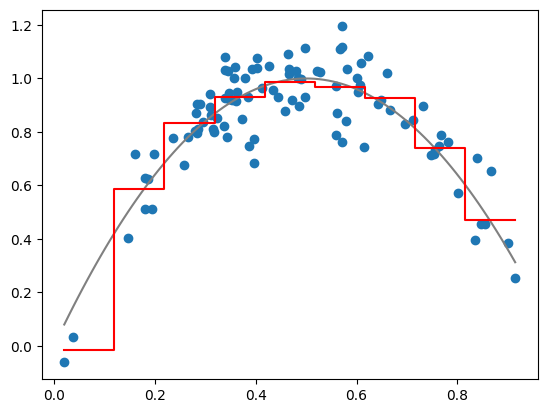

In [25]:
xs = np.linspace(np.min(x), np.max(x), 100)
fig, ax = plt.subplots()
ax.plot(xs, f(xs), color='gray');
ax.scatter(x, y);
ax.step(bins, np.concatenate([r, [np.nan]]), where='post', color='red');

First, we find
$$\begin{split}
\mathbb{E}[\hat{r}(x)] 
&= \mathbb{E}[\overline{Y}_j] \\
&= \mathbb{E}\left[\mathbb{E}\left[ \frac{1}{k} \sum_{l=1}^k Y_l \middle| B_j \text{ contains } k \text{ elements} \right]\right] \\
&= \sum_{k=1}^n \mathbb{E}\left[ \frac{1}{k} \sum_{l=1}^k Y_l \middle| B_j \text{ contains } k \text{ elements} \right] \mathbb{P}(B_j \text{ contains } k \text{ elements}) \\
&= \sum_{k=1}^n \mathbb{E}\left[ \frac{1}{k} \sum_{l=1}^k Y_l \middle| B_j \text{ contains } k \text{ elements} \right] {n \choose k} p_j^k (1 - p_j)^{n-k} \\
&= \sum_{k=1}^n \frac{1}{k} \sum_{l=1}^k \mathbb{E}\left[ Y_l \middle| B_j \text{ contains } k \text{ elements} \right] {n \choose k} p_j^k (1 - p_j)^{n-k} \\
&= \sum_{k=1}^n \mathbb{E}\left[ Y_l \middle| B_j \text{ contains } k \text{ elements} \right] {n \choose k} p_j^k (1 - p_j)^{n-k} \\
&= \sum_{k=1}^n \mathbb{E}\left[ Y_l \middle| B_j \text{ contains } (x_l, Y_l) \right] {n \choose k} p_j^k (1 - p_j)^{n-k} \\
&= \mathbb{E}\left[ Y_l \middle| B_j \text{ contains } (x_l, Y_l) \right] \sum_{k=1}^n  {n \choose k} p_j^k (1 - p_j)^{n-k} \\
&= \mathbb{E}\left[ Y_l \middle| B_j \text{ contains } (x_l, Y_l) \right] \\
&= \mathbb{E}\left[ \mathbb{E}\left[ Y_l \middle| B_j \text{ contains } (x_l, Y_l), x_l = x \right] \middle| B_j \text{ contains } (x_l, Y_l) \right] \\
&= \mathbb{E}\left[ \mathbb{E}\left[ r(x) + \varepsilon \middle| B_j \text{ contains } (x_l, Y_l), x_l = x \right] \middle| B_j \text{ contains } (x_l, Y_l) \right] \\
&= \mathbb{E}\left[ r(x_l) \middle| B_j \text{ contains } (x_l, Y_l) \right] \\
&= \frac{\int_{B_j} r(x) f(x) dx}{\int_{B_j} f(x) dx}, \\
\end{split}$$
where 
$$p_j = \int_{B_j} f(x) dx.$$

Now, using the expansions
$$\begin{split}
r(x_j^* + u) & \approx r(x_j^*) + r'(x_j^*) u + \frac{1}{2} r''(x_j^*) u^2, \\
f(x_j^* + u) & \approx f(x_j^*) + f'(x_j^*) u + \frac{1}{2} f''(x_j^*) u^2, \\
\end{split}$$
where $x_j^*$ is the left boundary of the $j$-th bin, we have
$$\begin{split}
\int_{B_j} r(x) f(x) dx 
&= \int_{0}^h r(x_j^* + u) f(x_j^* + u) du \\
&\approx \int_{0}^h \left( r(x_j^*) + r'(x_j^*) u + \frac{1}{2} r''(x_j^*) u^2 \right) \left( f(x_j^*) + f'(x_j^*) u + \frac{1}{2} f''(x_j^*) u^2 \right) du \\
&= \int_{0}^h \left( r(x_j^*) f(x_j^*) + r'(x_j^*) f(x_j^*) u + \frac{1}{2} r''(x_j^*) f(x_j^*) u^2 + r(x_j^*) f'(x_j^*) u + r'(x_j^*) f'(x_j^*) u^2 + \frac{1}{2} r''(x_j^*) f'(x_j^*) u^3 + \frac{1}{2} r(x_j^*)  f''(x_j^*) u^2 + \frac{1}{2} r'(x_j^*) f''(x_j^*) u^3 + \frac{1}{4} r''(x_j^*) f''(x_j^*) u^4 \right) du \\
&= r(x_j^*) f(x_j^*) h + r'(x_j^*) f(x_j^*) \frac{h^2}{2} + \frac{1}{2} r''(x_j^*) f(x_j^*) \frac{h^3}{3} + r(x_j^*) f'(x_j^*) \frac{h^2}{2} + r'(x_j^*) f'(x_j^*) \frac{h^3}{3} + \frac{1}{2} r''(x_j^*) f'(x_j^*) \frac{h^4}{4} + \frac{1}{2} r(x_j^*) f''(x_j^*) \frac{h^3}{3} + \frac{1}{2} r'(x_j^*) f''(x_j^*) \frac{h^4}{4} + \frac{1}{4} r''(x_j^*) f''(x_j^*) \frac{h^5}{5}. \\
&\approx r(x_j^*) f(x_j^*) h + r'(x_j^*) f(x_j^*) \frac{h^2}{2} + r(x_j^*) f'(x_j^*) \frac{h^2}{2}. \\
\end{split}$$

On the other hand,
$$\begin{split}
\int_{B_j} f(x) dx 
&= \int_{0}^h f(x_j^* + u) du \\
&= \int_{0}^h \left( f(x_j^*) + f'(x_j^*) u + \frac{1}{2} f''(x_j^*) u^2 \right) du \\
&= f(x_j^*) h + f'(x_j^*) \frac{h^2}{2} + \frac{1}{2} f''(x_j^*) \frac{h^3}{3}.
\end{split}$$

Then
$$\begin{split}
\frac{\int_{B_j} r(x) f(x) dx }{\int_{B_j} f(x) dx }
&\approx \frac{r(x_j^*) f(x_j^*) h + r'(x_j^*) f(x_j^*) \frac{h^2}{2} + r(x_j^*) f'(x_j^*) \frac{h^2}{2}}{f(x_j^*) h + f'(x_j^*) \frac{h^2}{2} + \frac{1}{2} f''(x_j^*) \frac{h^3}{3}} \\
&= \frac{f(x_j^*) h \left( r(x_j^*)  + r'(x_j^*) \frac{h}{2} + r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} \right)}{f(x_j^*) h \left( 1 + \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} + \frac{1}{2} \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3} \right)} \\
&= \frac{r(x_j^*)  + r'(x_j^*) \frac{h}{2} + r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2}}{1 + \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} + \frac{1}{2} \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3}} \\
&\approx \left(r(x_j^*)  + \left(r'(x_j^*) + r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)}\right) \frac{h}{2}\right)\left(1 - \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} - \frac{1}{2} \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3}\right) \\
&\approx r(x_j^*)  + r'(x_j^*) \frac{h}{2}, \\
\end{split}$$
where we assumed that $f(x) \neq 0$. The bias
$$\begin{split}
b(x) 
&= \mathbb{E}[\hat{r}(x)]  - r(x) \\
&\approx r(x_j^*)  + r'(x_j^*) \frac{h}{2} - r(x_j^*) - r'(x_j^*) (x - x_j^*) \\
&\approx r'(x_j^*) \left(\frac{h}{2} - (x - x_j^*)\right), \\
\end{split}$$
so
$$\begin{split}
\int_{B_j} b(x)^2 dx
&\approx \int_0^h (r'(x_j^*))^2 \left( \frac{h}{2} - u \right)^2 du \\
&= (r'(x_j^*))^2 \int_0^h \left( \frac{h}{2} - u \right)^2 du \\
&= (r'(x_j^*))^2 \int_0^h \left( \frac{h^2}{4} - u h + u^2 \right) du \\
&= (r'(x_j^*))^2 \left( \frac{h^3}{4} - \frac{h^3}{2} + \frac{h^3}{3} \right) \\
&= (r'(x_j^*))^2 \frac{h^3}{12} \\
\end{split}$$
and
$$\begin{split}
\int_0^1 b(x)^2 dx
&= \sum_{j=1}^m \int_{B_j} b(x)^2 dx \\
&= \sum_{j=1}^m (r'(x_j^*))^2 \frac{h^3}{12} \\
&= \frac{h^2}{12} \sum_{j=1}^m h (r'(x_j^*))^2  \\
&\approx \frac{h^2}{12} \int_0^1 (r'(x))^2 dx.  \\
\end{split}$$

By Theorem 3.27, we obtain
$$\begin{split}
\mathbb{V}[\hat{r}(x)] = \mathbb{V}[\mathbb{E}[\hat{r}(x) |  B_j \text{ contains } k \text{ elements}]] + \mathbb{E}[\mathbb{V}[\hat{r}(x) | B_j \text{ contains } k \text{ elements}]].
\end{split}$$
Now,
$$\begin{split}
\mathbb{V}[\mathbb{E}[\hat{r}(x) |  B_j \text{ contains } k \text{ elements}]]
&= \mathbb{V}\left[\mathbb{E}\left[ \frac{1}{k} \sum_{l=1}^k Y_l \middle|  B_j \text{ contains } k \text{ elements}\right]\right] \\
&= \mathbb{V}\left[\mathbb{E}\left[ Y_l \middle|  B_j \text{ contains } (x_l, Y_l)\right]\right] \\
&= \mathbb{V}\left[\mathbb{E}\left[ r(x_l) + \varepsilon \middle|  B_j \text{ contains } (x_l, Y_l)\right]\right] \\
&= \mathbb{V}\left[\mathbb{E}\left[ r(x_l) \middle|  B_j \text{ contains } (x_l, Y_l)\right]\right] \\
&= 0,
\end{split}$$
since $\mathbb{E}\left[ r(x_l) \middle|  B_j \text{ contains } (x_l, Y_l)\right]$ does not depend on $k$.

Further,
$$\begin{split}
\mathbb{E}[\mathbb{V}[\hat{r}(x) |  B_j \text{ contains } k \text{ elements}]]
&= \mathbb{E}\left[\mathbb{V}\left[ \frac{1}{k} \sum_{l=1}^k Y_l \middle|  B_j \text{ contains } k \text{ elements}\right]\right] \\
&= \mathbb{E}\left[\frac{1}{k}\mathbb{V}\left[ Y_l \middle|  B_j \text{ contains } (x_l, Y_l)\right]\right]. \\
\end{split}$$
Then
$$\begin{split}
\mathbb{V}\left[ Y_l \middle|  B_j \text{ contains } (x_l, Y_l)\right]
&= \mathbb{E}\left[\mathbb{V}\left[ Y_l \middle|  B_j \text{ contains } (x_l, Y_l), x_l = x\right] \middle|  B_j \text{ contains } (x_l, Y_l) \right]+ \mathbb{V} \left[ \mathbb{E}\left[ Y_l \middle|  B_j \text{ contains } (x_l, Y_l), x_l = x\right] \middle|  B_j \text{ contains } (x_l, Y_l) \right] \\
&= \mathbb{E}\left[\mathbb{V}\left[ r(x) + \varepsilon \middle|  B_j \text{ contains } (x_l, Y_l), x_l = x\right] \middle|  B_j \text{ contains } (x_l, Y_l) \right] + \mathbb{V}\left[\mathbb{E}\left[ r(x) + \varepsilon \middle|  B_j \text{ contains } (x_l, Y_l), x_l = x\right] \middle|  B_j \text{ contains } (x_l, Y_l) \right] \\
&= \mathbb{E}\left[ \sigma_\varepsilon^2 \middle|  B_j \text{ contains } (x_l, Y_l)\right] + \mathbb{V}\left[ r(x_l) \middle|  B_j \text{ contains } (x_l, Y_l)\right] \\
&= \sigma_\varepsilon^2 + \mathbb{V}\left[ r(x_l) \middle|  B_j \text{ contains } (x_l, Y_l)\right] \\
&= \sigma_\varepsilon^2 + \mathbb{E}\left[ r(x_l)^2 \middle|  B_j \text{ contains } (x_l, Y_l)\right] -  \mathbb{E}\left[ r(x_l) \middle|  B_j \text{ contains } (x_l, Y_l)\right]^2. \\
\end{split}$$

We have
$$\begin{split}
\int_{B_j} r(x)^2 f(x) dx
&\approx \int_0^h \left(r(x_j^*) + r'(x_j^*) u + \frac{1}{2} r''(x_j^*) u^2\right)^2 \left(f(x_j^*) + f'(x_j^*) u + \frac{1}{2} f''(x_j^*) u^2 \right) du \\
&= \int_0^h \left(r(x_j^*)^2 + (r'(x_j^*))^2 u^2 + \frac{1}{4} (r''(x_j^*))^2 u^4 + 2 r(x_j^*) r'(x_j^*) u + r(x_j^*) r''(x_j^*) u^2 + r'(x_j^*) r''(x_j^*) u^3  \right) \left(f(x_j^*) + f'(x_j^*) u + \frac{1}{2} f''(x_j^*) u^2 \right) du \\
&\approx \int_0^h \left(r(x_j^*)^2 f(x_j^*) + (r'(x_j^*))^2 f(x_j^*) u^2 + 2 r(x_j^*) r'(x_j^*) f(x_j^*) u + r(x_j^*) r''(x_j^*) f(x_j^*) u^2 + r(x_j^*)^2 f'(x_j^*) u + 2 r(x_j^*) r'(x_j^*) f'(x_j^*) u^2 + \frac{1}{2} r(x_j^*)^2 f''(x_j^*) u^2 \right) du \\
&= \int_0^h \left(r(x_j^*)^2 f(x_j^*) + \left( 2 r(x_j^*) r'(x_j^*) f(x_j^*) + r(x_j^*)^2 f'(x_j^*) \right) u + \left( (r'(x_j^*))^2 f(x_j^*) + r(x_j^*) r''(x_j^*) f(x_j^*) + 2 r(x_j^*) r'(x_j^*) f'(x_j^*) + \frac{1}{2} r(x_j^*)^2 f''(x_j^*) \right) u^2 \right) du \\
&= r(x_j^*)^2 f(x_j^*) h + \left( 2 r(x_j^*) r'(x_j^*) f(x_j^*) + r(x_j^*)^2 f'(x_j^*) \right) \frac{h^2}{2} + \left( (r'(x_j^*))^2 f(x_j^*) + r(x_j^*) r''(x_j^*) f(x_j^*) + 2 r(x_j^*) r'(x_j^*) f'(x_j^*) + \frac{1}{2} r(x_j^*)^2 f''(x_j^*) \right) \frac{h^3}{3}, \\
\end{split}$$
and
$$\begin{split}
\int_{B_j} f(x) dx
&\approx \int_0^h \left(f(x_j^*) + f'(x_j^*) u + \frac{1}{2} f''(x_j^*) u^2 \right) du \\
&= f(x_j^*) h + f'(x_j^*) \frac{h^2}{2} + \frac{1}{2} f''(x_j^*) \frac{h^3}{3}, \\
\end{split}$$
thus
$$\begin{split}
\mathbb{E}\left[ r(x_l)^2 \middle|  B_j \text{ contains } (x_l, Y_l)\right]
  &= \frac{\int_{B_j} r(x)^2 f(x) dx}{\int_{B_j} f(x) dx} \\
  &\approx \frac{r(x_j^*)^2 f(x_j^*) h + \left( 2 r(x_j^*) r'(x_j^*) f(x_j^*) + r(x_j^*)^2 f'(x_j^*) \right) \frac{h^2}{2} + \left( (r'(x_j^*))^2 f(x_j^*) + r(x_j^*) r''(x_j^*) f(x_j^*) + 2 r(x_j^*) r'(x_j^*) f'(x_j^*) + \frac{1}{2} r(x_j^*)^2 f''(x_j^*) \right) \frac{h^3}{3}}{f(x_j^*) h + f'(x_j^*) \frac{h^2}{2} + \frac{1}{2} f''(x_j^*) \frac{h^3}{3}} \\
  &= \frac{r(x_j^*)^2 + \left( 2 r(x_j^*) r'(x_j^*) + r(x_j^*)^2 \frac{f'(x_j^*)}{f(x_j^*)} \right) \frac{h}{2} + \left( (r'(x_j^*))^2 + r(x_j^*) r''(x_j^*) + 2 r(x_j^*) r'(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} + \frac{1}{2} r(x_j^*)^2 \frac{f''(x_j^*)}{f(x_j^*)} \right) \frac{h^2}{3}}{1 + \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} + \frac{1}{2} \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3}} \\
  &= \left( r(x_j^*)^2 + \left( 2 r(x_j^*) r'(x_j^*) + r(x_j^*)^2 \frac{f'(x_j^*)}{f(x_j^*)} \right) \frac{h}{2} + \left( (r'(x_j^*))^2 + r(x_j^*) r''(x_j^*) + 2 r(x_j^*) r'(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} + \frac{1}{2} r(x_j^*)^2 \frac{f''(x_j^*)}{f(x_j^*)} \right) \frac{h^2}{3} \right) \left(1 - \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} - \frac{1}{2} \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3} \right) \\
  &= r(x_j^*)^2 + \left( 2 r(x_j^*) r'(x_j^*) + r(x_j^*)^2 \frac{f'(x_j^*)}{f(x_j^*)} \right) \frac{h}{2} + \left( (r'(x_j^*))^2 + r(x_j^*) r''(x_j^*) + 2 r(x_j^*) r'(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} + \frac{1}{2} r(x_j^*)^2 \frac{f''(x_j^*)}{f(x_j^*)} \right) \frac{h^2}{3} - r(x_j^*)^2 \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} - \left( 2 r(x_j^*) r'(x_j^*) + r(x_j^*)^2 \frac{f'(x_j^*)}{f(x_j^*)} \right) \frac{f'(x_j^*)}{f(x_j^*)} \frac{h^2}{4} - \frac{1}{2} r(x_j^*)^2 \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3} \\
  &= r(x_j^*)^2 + r(x_j^*) r'(x_j^*) h + \left( \frac{1}{3}(r'(x_j^*))^2 + \frac{1}{3} r(x_j^*) r''(x_j^*) + \frac{1}{6} r(x_j^*) r'(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} - \frac{1}{4}\left(r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} \right)^2 \right) h^2 \\
  &= r(x_j^*)^2 + r(x_j^*) r'(x_j^*) h + o(h). \\
\end{split}$$

Next,
$$\begin{split}
\int_{B_j} r(x) f(x) dx
&\approx \int_0^h \left(r(x_j^*) + r'(x_j^*) u + \frac{1}{2} r''(x_j^*) u^2\right) \left(f(x_j^*) + f'(x_j^*) u + \frac{1}{2} f''(x_j^*) u^2 \right) du \\
&= \int_0^h \left(r(x_j^*) f(x_j^*) + r'(x_j^*) f(x_j^*) u + \frac{1}{2} r''(x_j^*) f(x_j^*) u^2 + r(x_j^*) f'(x_j^*) u + r'(x_j^*) f'(x_j^*) u^2 + \frac{1}{2} r''(x_j^*) f'(x_j^*) u^3 + \frac{1}{2} r(x_j^*) f''(x_j^*) u^2 + \frac{1}{2} r'(x_j^*) f''(x_j^*) u^3 + \frac{1}{4} r''(x_j^*) f''(x_j^*) u^4 \right) du \\
&\approx \int_0^h \left(r(x_j^*) f(x_j^*) + r'(x_j^*) f(x_j^*) u + \frac{1}{2} r''(x_j^*) f(x_j^*) u^2 + r(x_j^*) f'(x_j^*) u + r'(x_j^*) f'(x_j^*) u^2 + \frac{1}{2} r(x_j^*) f''(x_j^*) u^2 \right) du \\
&= r(x_j^*) f(x_j^*) h + \left( r'(x_j^*) f(x_j^*) + r(x_j^*) f'(x_j^*) \right) \frac{h^2}{2} + \left( \frac{1}{2} r''(x_j^*) f(x_j^*) + r'(x_j^*) f'(x_j^*) + \frac{1}{2} r(x_j^*) f''(x_j^*) \right) \frac{h^3}{3} \\
\end{split}$$
thus
$$\begin{split}
\mathbb{E}\left[ r(x_l) \middle|  B_j \text{ contains } (x_l, Y_l)\right]
  &= \frac{\int_{B_j} r(x) f(x) dx}{\int_{B_j} f(x) dx} \\
  &\approx \frac{r(x_j^*) f(x_j^*) h + \left( r'(x_j^*) f(x_j^*) + r(x_j^*) f'(x_j^*) \right) \frac{h^2}{2} + \left( \frac{1}{2} r''(x_j^*) f(x_j^*) + r'(x_j^*) f'(x_j^*) + \frac{1}{2} r(x_j^*) f''(x_j^*) \right) \frac{h^3}{3}}{f(x_j^*) h + f'(x_j^*) \frac{h^2}{2} + \frac{1}{2} f''(x_j^*) \frac{h^3}{3}} \\
  &= \frac{r(x_j^*) + \left( r'(x_j^*) + r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} \right) \frac{h}{2} + \left( \frac{1}{2} r''(x_j^*) + r'(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} + \frac{1}{2} r(x_j^*) \frac{f''(x_j^*)}{f(x_j^*)} \right) \frac{h^2}{3}}{1 + \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} + \frac{1}{2} \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3}} \\
  &\approx \left(r(x_j^*) + \left( r'(x_j^*) + r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} \right) \frac{h}{2} + \left( \frac{1}{2} r''(x_j^*) + r'(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} + \frac{1}{2} r(x_j^*) \frac{f''(x_j^*)}{f(x_j^*)} \right) \frac{h^2}{3}\right)\left(1 - \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} - \frac{1}{2} \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3}\right) \\
  &\approx r(x_j^*) + \left( r'(x_j^*) + r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} \right) \frac{h}{2} + \left( \frac{1}{2} r''(x_j^*) + r'(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} + \frac{1}{2} r(x_j^*) \frac{f''(x_j^*)}{f(x_j^*)} \right) \frac{h^2}{3} - r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} \frac{h}{2} - \left( r'(x_j^*) + r(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)} \right) \frac{f'(x_j^*)}{f(x_j^*)} \frac{h^2}{4} - \frac{1}{2} r(x_j^*) \frac{f''(x_j^*)}{f(x_j^*)} \frac{h^2}{3} \\
  &= r(x_j^*) + r'(x_j^*) \frac{h}{2} + \left( \frac{1}{6} r''(x_j^*) + \frac{1}{12} r'(x_j^*) \frac{f'(x_j^*)}{f(x_j^*)}- \frac{1}{4} r(x_j^*) \left(\frac{f'(x_j^*)}{f(x_j^*)}\right)^2 \right) h^2 \\
  &= r(x_j^*) + r'(x_j^*) \frac{h}{2} + o(h). \\
\end{split}$$

Therefore,
$$\begin{split}
\mathbb{E}\left[ r(x_l)^2 \middle|  B_j \text{ contains } (x_l, Y_l)\right] - \mathbb{E}\left[ r(x_l) \middle|  B_j \text{ contains } (x_l, Y_l)\right]^2
&\approx r(x_j^*)^2 + r(x_j^*) r'(x_j^*) h + o(h) - \left( r(x_j^*) + r'(x_j^*) \frac{h}{2} + o(h) \right)^2 \\
&= r(x_j^*)^2 + r(x_j^*) r'(x_j^*) h + o(h) - r(x_j^*)^2 - r(x_j^*) r'(x_j^*) h + o(h) \\
&= o(h).
\end{split}$$

We have
$$\begin{split}
\mathbb{V}\left[ Y_l \middle|  B_j \text{ contains } (x_l, Y_l)\right] 
&= \sigma_\varepsilon^2 + \mathbb{E}\left[ r(x_l)^2 \middle|  B_j \text{ contains } (x_l, Y_l)\right] -  \mathbb{E}\left[ r(x_l) \middle|  B_j \text{ contains } (x_l, Y_l)\right]^2. \\
&\approx \sigma_\varepsilon^2 + o(h) \\
&\approx \sigma_\varepsilon^2
\end{split}$$
does not depend on $k$, therefore
$$\begin{split}
\mathbb{E}[\mathbb{V}[\hat{r}(x) |  B_j \text{ contains } k \text{ elements}]]
&= \mathbb{E}\left[\frac{1}{k}\right] \mathbb{V}\left[ Y_l \middle|  B_j \text{ contains } (x_l, Y_l)\right] . \\
\end{split}$$
We approximate
$$\begin{split}
\mathbb{E}\left[\frac{1}{k}\right] 
&\approx \mathbb{E}\left[\frac{1}{k + 1}\right] \\
&= \frac{1 - (1 - p_j)^{n+1}}{p_j (n + 1)} \\
&\approx \frac{1}{np_j} \\
&\approx \frac{1}{n f(x_j^*) h},
\end{split}$$
so
$$\begin{split}
v(x) 
\approx \frac{1}{nh} \frac{1}{f(x_j^*)} \sigma_\varepsilon^2
\end{split}$$
and
$$\begin{split}
\int_0^1 v(x) dx
&\approx h \sum_{j=1}^m \frac{1}{nh} \frac{1}{f(x_j^*)} \sigma_\varepsilon^2 \\
&= \frac{\sigma_\varepsilon^2}{nh} h \sum_{j=1}^m \frac{1}{f(x_j^*)} \\
&\approx \frac{\sigma_\varepsilon^2}{nh} \int_0^1 \frac{dx}{f(x)}. \\
\end{split}$$

Finally, by Lemma 20.1, the risk is given by
$$\begin{split}
R(h)
&= \int_0^1 b(x)^2 dx + \int_0^1 v(x) dx \\
&\approx \frac{h^2}{12} \int_0^1 (r'(x))^2 dx + \frac{\sigma_\varepsilon^2}{nh} \int_0^1 \frac{dx}{f(x)}. \\
\end{split}$$
The risk is minimised when
$$h^3 = \frac{\sigma_\varepsilon^2}{2n} \frac{\int_0^1 \frac{dx}{f(x)}}{\int_0^1 (r'(x))^2 dx},$$
so 
$$h^* \sim n^{-1/3}$$
and the minimum risk
$$R(h^*) \sim n^{-2/3}.$$

## Exercise 9

Assuming the $r$ is continuously differentiable, we have by Taylor's theorem
$$r(x_{i+1}) = r(x_i) + r'(c) (x_{i+1} - x_i),$$
where $c \in (x_i, x_{i+1})$. Then
$$\begin{split}
\mathbb{E}[\hat{\sigma}^2]
&= \mathbb{E}\left[ \frac{1}{2(n-1)} \sum_{i=1}^{n-1} (Y_{i+1} - Y_i)^2\right] \\
&= \frac{1}{2(n-1)} \sum_{i=1}^{n-1} \mathbb{E}\left[(Y_{i+1} - Y_i)^2\right] \\
&= \frac{1}{2} \mathbb{E}\left[(Y_{i+1} - Y_i)^2\right] \\
&= \frac{1}{2} \mathbb{E}\left[(r(x_{i+1}) + \varepsilon_{i+1} - r(x_i) - \varepsilon_i)^2\right] \\
&= \frac{1}{2} \mathbb{E}\left[(r'(c) (x_{i+1} - x_i) + (\varepsilon_{i+1} - \varepsilon_i))^2\right] \\
&= \frac{1}{2} \mathbb{E}\left[(r'(c))^2 (x_{i+1} - x_i)^2 + 2 (r'(c) (x_{i+1} - x_i) (\varepsilon_{i+1} - \varepsilon_i) + (\varepsilon_{i+1} - \varepsilon_i)^2\right] \\
&= \frac{1}{2} \left( (r'(c))^2 (x_{i+1} - x_i)^2 + 2 (r'(c) (x_{i+1} - x_i) \mathbb{E}[\varepsilon_{i+1} - \varepsilon_i] + \mathbb{E}\left[(\varepsilon_{i+1} - \varepsilon_i)^2\right] \right) \\
&= \frac{1}{2} \left( (r'(c))^2 (x_{i+1} - x_i)^2 + \mathbb{E}\left[\varepsilon_{i+1}^2 - 2 \varepsilon_{i+1} \varepsilon_i + \varepsilon_i^2\right] \right) \\
&= \frac{1}{2} \left( (r'(c))^2 (x_{i+1} - x_i)^2 + \mathbb{E}\left[\varepsilon_{i+1}^2\right] - 2 \mathbb{E}[\varepsilon_{i+1}] \mathbb{E}[\varepsilon_i] + \mathbb{E}\left[\varepsilon_i^2\right] \right) \\
&= \frac{1}{2} \left( (r'(c))^2 (x_{i+1} - x_i)^2 + \mathbb{V}[\varepsilon_{i+1}] + \mathbb{V}[\varepsilon_i] \right) \\
&= \frac{1}{2} \left( (r'(c))^2 (x_{i+1} - x_i)^2 + 2 \mathbb{V}[\varepsilon_i] \right) \\
&= \frac{1}{2} (r'(c))^2 (x_{i+1} - x_i)^2 + \mathbb{V}[\varepsilon_i] \\
&\to \mathbb{V}[\varepsilon_i]
\end{split}$$
where we used:

   * $\mathbb{E}[\varepsilon_i] = \mathbb{E}[\varepsilon_{i+1}] = 0$,
   * $\mathbb{E}[\varepsilon_{i+1} - \varepsilon_i] = \mathbb{E}[\varepsilon_{i+1}] - \mathbb{E}[\varepsilon_i] = 0$,
   * $\mathbb{E}[\varepsilon_{i+1} \varepsilon_i] = \mathbb{E}[\varepsilon_{i+1}] \mathbb{E}[\varepsilon_i]$ since $\varepsilon_{i}$ and $\varepsilon_{i+1}$ are independent,
   * $\mathbb{V}[\varepsilon_i] = \mathbb{E}[\varepsilon_i^2] - \mathbb{E}[\varepsilon_i]^2 = \mathbb{E}[\varepsilon_i^2]$ since $\mathbb{E}[\varepsilon_i] = 0$ and similarly for $\varepsilon_{i+1}$,
   * $\mathbb{V}[\varepsilon_{i+1}] = \mathbb{V}[\varepsilon_i]$ since $\varepsilon_i$ are assumed to be identically distributed,
   * $(x_{i+1} - x_i)^2 \to \infty$ as $n \to \infty$.

Thus, $\hat{\sigma}^2$ is a constistent estimator of $\mathbb{V}[\varepsilon]$.

## Exercise 10

We have
$$\begin{split}
\hat{r}_{-i}(x_i) 
&= \frac{\sum_{\substack{j=1\\j\neq i}}^n K\left(\frac{x_i - x_j}{h}\right) Y_j}{\sum_{\substack{j=1\\j\neq i}}^n K\left(\frac{x_i - x_j}{h}\right)} \\
&= \frac{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right) Y_j - K(0) Y_i}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right) - K(0)} \\
&= \frac{\frac{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right) Y_j}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)} - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)} Y_i}{1 - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)}} \\
&= \frac{\hat{r}(x_i) - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)} Y_i}{1 - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)}}, \\
\end{split}$$
so
$$\begin{split}
Y_i - \hat{r}_{-i}(x_i) 
&= Y_i - \frac{\hat{r}(x_i) - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)} Y_i}{1 - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)}} \\
&= \frac{Y_i \left( 1 - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)} \right) - \hat{r}(x_i) + \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)} Y_i}{1 - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)}} \\
&= \frac{Y_i - \hat{r}(x_i)}{1 - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)}} \\
\end{split}$$
and
$$\begin{split}
\sum_{j=1}^n \left( Y_i - \hat{r}_{-i}(x_i)  \right)^2
&= \sum_{j=1}^n \left( Y_i - \hat{r}(x_i)\right)^2 \frac{1}{\left(1 - \frac{K(0)}{\sum_{j=1}^n K\left(\frac{x_i - x_j}{h}\right)}\right)^2}.
\end{split}$$